<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/Linkedin_CP_Puzzle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Developed by Alireza Soroudi
alireza.soroudi@gmail.com

Linkedin News letter : https://www.linkedin.com/newsletters/optimization-in-open-source-6874020019009859585/

Git hub: https://github.com/OptimizationExpert/Pyomo

In [1]:
!pip install ortools
from ortools.sat.python import cp_model # CP-SAT solver
import numpy as np
from random import randint
import random
from math import ceil
import pandas as pd
import matplotlib.pyplot as plt # Data visualization
#plt.rcParams["figure.figsize"] = (15,10)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.3/309.3 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.27.3 which is incompatible.
google-ai-generativelanguage 0.6.6 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.2

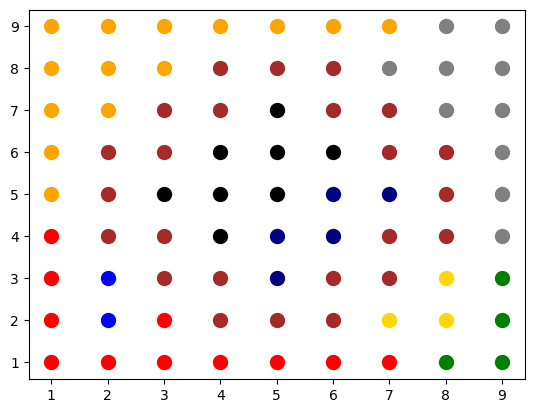

{1: (1, 9, 0),
 2: (2, 9, 0),
 3: (3, 9, 0),
 4: (4, 9, 0),
 5: (5, 9, 0),
 6: (6, 9, 0),
 7: (7, 9, 0),
 8: (8, 9, 7),
 9: (9, 9, 7),
 10: (1, 8, 0),
 11: (2, 8, 0),
 12: (3, 8, 0),
 13: (4, 8, 8),
 14: (5, 8, 8),
 15: (6, 8, 8),
 16: (7, 8, 7),
 17: (8, 8, 7),
 18: (9, 8, 7),
 19: (1, 7, 0),
 20: (2, 7, 0),
 21: (3, 7, 8),
 22: (4, 7, 8),
 23: (5, 7, 2),
 24: (6, 7, 8),
 25: (7, 7, 8),
 26: (8, 7, 7),
 27: (9, 7, 7),
 28: (1, 6, 0),
 29: (2, 6, 8),
 30: (3, 6, 8),
 31: (4, 6, 2),
 32: (5, 6, 2),
 33: (6, 6, 2),
 34: (7, 6, 8),
 35: (8, 6, 8),
 36: (9, 6, 7),
 37: (1, 5, 0),
 38: (2, 5, 8),
 39: (3, 5, 2),
 40: (4, 5, 2),
 41: (5, 5, 2),
 42: (6, 5, 4),
 43: (7, 5, 4),
 44: (8, 5, 8),
 45: (9, 5, 7),
 46: (1, 4, 1),
 47: (2, 4, 8),
 48: (3, 4, 8),
 49: (4, 4, 2),
 50: (5, 4, 4),
 51: (6, 4, 4),
 52: (7, 4, 8),
 53: (8, 4, 8),
 54: (9, 4, 7),
 55: (1, 3, 1),
 56: (2, 3, 3),
 57: (3, 3, 8),
 58: (4, 3, 8),
 59: (5, 3, 4),
 60: (6, 3, 8),
 61: (7, 3, 8),
 62: (8, 3, 5),
 63: (9, 3, 6),
 

In [31]:
dic= {
    (1, 1): 0, (1, 2): 0, (1, 3): 0, (1, 4): 0, (1, 5): 0, (1, 6): 0, (1, 7): 0, (1, 8): 7, (1, 9): 7,
    (2, 1): 0, (2, 2): 0, (2, 3): 0, (2, 4): 8, (2, 5): 8, (2, 6): 8, (2, 7): 7, (2, 8): 7, (2, 9): 7,
    (3, 1): 0, (3, 2): 0, (3, 3): 8, (3, 4): 8, (3, 5): 2, (3, 6): 8, (3, 7): 8, (3, 8): 7, (3, 9): 7,
    (4, 1): 0, (4, 2): 8, (4, 3): 8, (4, 4): 2, (4, 5): 2, (4, 6): 2, (4, 7): 8, (4, 8): 8, (4, 9): 7,
    (5, 1): 0, (5, 2): 8, (5, 3): 2, (5, 4): 2, (5, 5): 2, (5, 6): 4, (5, 7): 4, (5, 8): 8, (5, 9): 7,
    (6, 1): 1, (6, 2): 8, (6, 3): 8, (6, 4): 2, (6, 5): 4, (6, 6): 4, (6, 7): 8, (6, 8): 8, (6, 9): 7,
    (7, 1): 1, (7, 2): 3, (7, 3): 8, (7, 4): 8, (7, 5): 4, (7, 6): 8, (7, 7): 8, (7, 8): 5, (7, 9): 6,
    (8, 1): 1, (8, 2): 3, (8, 3): 1, (8, 4): 8, (8, 5): 8, (8, 6): 8, (8, 7): 5, (8, 8): 5, (8, 9): 6,
    (9, 1): 1, (9, 2): 1, (9, 3): 1, (9, 4): 1, (9, 5): 1, (9, 6): 1, (9, 7): 1, (9, 8): 6, (9, 9): 6
}
KOLORs = ['r','k','b','navy','gold','g','grey','brown','orange']
info = {}
c= 0
for (i,j),v in dic.items():
  x,y = i,j
  plt.scatter(y,10-x,s=100, c= KOLORs[v-1])
  c+=1
  info[c] = (y,10-x,v)
plt.show()
info

In [29]:
N = len(dic)
info_color = {}
for c,(x,y,v) in info.items():
  info_color[v] = info_color.get(v,[])+[c]
info_color


{0: [1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 19, 20, 28, 37],
 7: [8, 9, 16, 17, 18, 26, 27, 36, 45, 54],
 8: [13,
  14,
  15,
  21,
  22,
  24,
  25,
  29,
  30,
  34,
  35,
  38,
  44,
  47,
  48,
  52,
  53,
  57,
  58,
  60,
  61,
  67,
  68,
  69],
 2: [23, 31, 32, 33, 39, 40, 41, 49],
 4: [42, 43, 50, 51, 59],
 1: [46, 55, 64, 66, 73, 74, 75, 76, 77, 78, 79],
 3: [56, 65],
 5: [62, 70, 71],
 6: [63, 72, 80, 81]}

In [ ]:
dest

[20, 21]

{20: [0, 2, 3, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19],
 21: [1, 4, 8, 10, 14]}

In [48]:
class VarArraySolutionPrinter(cp_model.CpSolverSolutionCallback):
    """Print intermediate solutions."""

    def __init__(self, variables):
        cp_model.CpSolverSolutionCallback.__init__(self)
        self.__variables = variables
        self.__solution_count = 0


    def on_solution_callback(self):
        self.__solution_count += 1
        print(self.__solution_count , [self.Value(self.__variables[i]) for i in self.__variables])

    def solution_count(self):
        return self.__solution_count


model = cp_model.CpModel()
solver = cp_model.CpSolver()
nodes = range(1,N+1)
U = {c:model.NewBoolVar(f"queen_{c}") for c in nodes}
colors = info_color.keys()

for n in nodes:
  expressions = [U[n]]+[U[c] for c in nodes if n!=c and (info[n][0] - info[c][0])**2 +(info[n][1] - info[c][1])**2<2]
  model.AddAtMostOne(expressions)

for c in colors:
  expressions = [U[n] for n in nodes if info[n][2] == c]
  model.AddExactlyOne(expressions)

for x in range(1,10):
  expressions = [U[n] for n in nodes if info[n][0] == x]
  model.AddAtMostOne(expressions)

for y in range(1,10):
  expressions = [U[n] for n in nodes if info[n][1] == y]
  model.AddAtMostOne(expressions)

solver.parameters.enumerate_all_solutions = True
solution_printer = VarArraySolutionPrinter(U)
status = solver.Solve(model, solution_printer)
#solver.Solve(model)

1 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


4
16
23
30
42
46
62
65
81


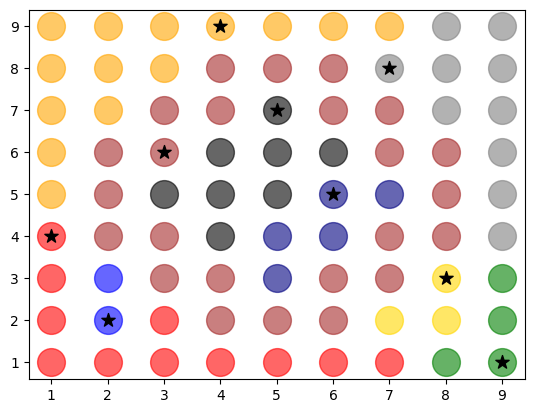

In [44]:
for c,(x,y,v) in info.items():
  plt.scatter(x,y,s=400, c= KOLORs[v-1], alpha= 0.6)

for i,v in U.items():
  if solver.Value(v) == 1:
    print(i)
    x,y = info[i][0],info[i][1]
    plt.scatter(x,y,s=100, c= 'k', marker='*')
plt.show()
